###Install packages

In [1]:
pip install xgboost

In [2]:
pip install joblib

In [3]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.0 MB/s eta 0:00:00


In [4]:
pip install --upgrade catboost

###Importing the libraries

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import sklearn
import plotly.express as px
from tqdm.auto import trange
from time import sleep


from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import joblib

import warnings
warnings.filterwarnings('ignore')

###Loading dataset


In [8]:
df = pd.read_csv('/content/tehranhouses.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [9]:
df.shape

(3479, 8)

In [10]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [11]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   int64  
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(1), int64(2), object(2)
memory usage: 146.2+ KB


As you can see، the column area is of the object type and needs to be changed numerically so that we can train the data on our model.

In [13]:
df['Area'] = df['Area'].apply(lambda x: re.sub(',','',x))
df['Area'] = pd.to_numeric(df['Area'],errors = 'coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   int64  
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   int64  
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(1), int64(3), object(1)
memory usage: 146.2+ KB


In [15]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [16]:
df[df['Address'].isnull()]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
43,60,2,True,True,True,NaN,2650000000,88333.33
662,85,2,True,True,True,NaN,1955000000,65166.67
706,117,2,True,True,True,NaN,6500000000,216666.67
1108,77,2,True,True,False,NaN,2020000000,67333.33
1109,71,1,True,True,True,NaN,2300000000,76666.67
1577,100,2,True,True,True,NaN,3100000000,103333.33
1796,70,2,True,True,True,NaN,4830000000,161000.00
2071,94,2,True,True,True,NaN,3000000000,100000.00
2072,99,2,True,True,True,NaN,4150000000,138333.33
2127,63,1,True,True,False,NaN,730000000,24333.33


There are no addresses in 23 of the data, so using SimpleImputer to fix them.

In [17]:
df_1 = df.copy()

In [18]:
df_1.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [19]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   int64  
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   int64  
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(1), int64(3), object(1)
memory usage: 146.2+ KB


In [20]:
imputer = SimpleImputer(strategy='most_frequent')
df_impute = pd.DataFrame(imputer.fit_transform(df_1), columns=df.columns)
df_impute = df_impute.astype(df.dtypes)


In [21]:
df_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   int64  
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3479 non-null   object 
 6   Price       3479 non-null   int64  
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(1), int64(3), object(1)
memory usage: 146.2+ KB


In [22]:
df_impute.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [23]:
df_impute.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [24]:
df_impute.drop(columns = 'Price(USD)', inplace = True)



In [25]:
df_impute.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,True,True,True,Shahran,1850000000
1,60,1,True,True,True,Shahran,1850000000
2,79,2,True,True,True,Pardis,550000000
3,95,2,True,True,True,Shahrake Qods,902500000
4,123,2,True,True,True,Shahrake Gharb,7000000000


In [26]:
df_impute.isnull().sum()

Area         0
Room         0
Parking      0
Warehouse    0
Elevator     0
Address      0
Price        0
dtype: int64

In [27]:
df_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       3479 non-null   int64 
 1   Room       3479 non-null   int64 
 2   Parking    3479 non-null   bool  
 3   Warehouse  3479 non-null   bool  
 4   Elevator   3479 non-null   bool  
 5   Address    3479 non-null   object
 6   Price      3479 non-null   int64 
dtypes: bool(3), int64(3), object(1)
memory usage: 119.0+ KB


###Using get_dummies for encoding *Addresses*

In [28]:
address_dummy = pd.get_dummies(df_impute['Address'])
df2 = df_impute.merge(address_dummy, left_index = True, right_index = True)


In [29]:
df2.head(20)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Abazar,Abbasabad,Absard,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,True,True,True,Shahran,1850000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,60,1,True,True,True,Shahran,1850000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,79,2,True,True,True,Pardis,550000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95,2,True,True,True,Shahrake Qods,902500000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,123,2,True,True,True,Shahrake Gharb,7000000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,70,2,True,True,False,North Program Organization,2050000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,87,2,True,True,True,Pardis,600000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,59,1,True,True,True,Shahran,2150000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,54,2,True,True,False,Andisheh,493000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,71,1,True,True,True,West Ferdows Boulevard,2370000000,False,False,False,...,False,True,False,False,False,False,False,False,False,False


###Encoding Parking, Warehouse and Elevator


In [30]:
Parking_encoding = {'True': 1, 'False': 0}
Warehouse_encoding = {'True': 1, 'False': 0}
Elevator_encoding = {'True': 1, 'False': 0}
df2['Parking'] = df2['Parking'].astype(str)
df2['Warehouse'] = df2['Warehouse'].astype(str)
df2['Elevator'] = df2['Elevator'].astype(str)

df2['Parking'] = df2['Parking'].map(Parking_encoding)
df2['Warehouse'] = df2['Warehouse'].map(Warehouse_encoding)
df2['Elevator'] = df2['Elevator'].map(Elevator_encoding)

In [31]:
df2.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Abazar,Abbasabad,Absard,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,Shahran,1850000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,60,1,1,1,1,Shahran,1850000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,79,2,1,1,1,Pardis,550000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95,2,1,1,1,Shahrake Qods,902500000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,123,2,1,1,1,Shahrake Gharb,7000000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
#formatter = {'Price':'{:,}'}
#df2.style.format(formatter)
#df2.loc[:, "Price"] =df["Price"].map('{:,.0f}'.format)
#df2["Price"] = df2["Price"].str.replace(",", "").astype(float)
#df2["Area"] = df2["Area"].astype(float)
#df2["Room"] = df2["Room"].astype(float)
df2

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Abazar,Abbasabad,Absard,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,Shahran,1850000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,60,1,1,1,1,Shahran,1850000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,79,2,1,1,1,Pardis,550000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95,2,1,1,1,Shahrake Qods,902500000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,123,2,1,1,1,Shahrake Gharb,7000000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,Southern Janatabad,3500000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3475,83,2,1,1,1,Niavaran,6800000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3476,75,2,0,0,0,Parand,365000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3477,105,2,1,1,1,Dorous,5600000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
df2['Parking'].dtypes

dtype('int64')

In [34]:
df2['Parking'].value_counts(normalize = True) * 100

Parking
1    84.794481
0    15.205519
Name: proportion, dtype: float64

In [35]:
df2['Elevator'].value_counts(normalize= True) * 100

Elevator
1    78.72952
0    21.27048
Name: proportion, dtype: float64

In [36]:
df2['Warehouse'].value_counts(normalize=True) * 100

Warehouse
1    91.463064
0     8.536936
Name: proportion, dtype: float64

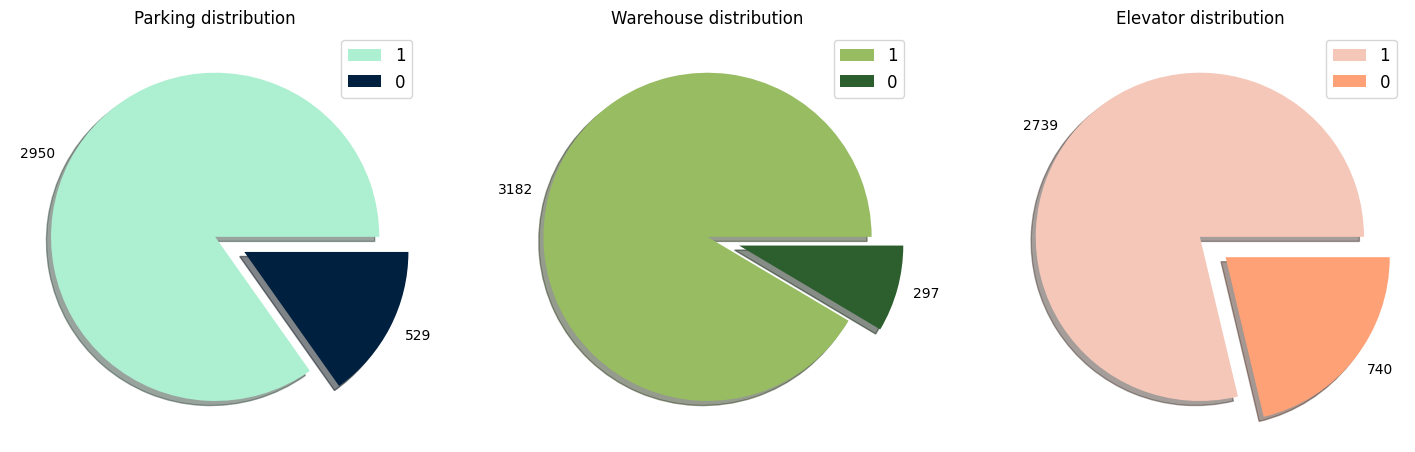

In [37]:
fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#ADEFD1FF', '#00203FFF'], ['#97BC62FF', '#2C5F2D'], ['#F5C7B8FF', '#FFA177FF']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(3):
        data = df2[columns[i]].value_counts()
        ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True)
        ax[i].legend(labels=data.index, fontsize='large')
        ax[i].set_title('{} distribution'.format(columns[i]))

In [38]:
df2.groupby('Room')['Price'].mean().reset_index()

,Room,Price
0,0,7.860500e+09
1,1,1.703751e+09
2,2,3.322727e+09
3,3,1.092580e+10
4,4,2.560033e+10
5,5,3.373439e+10


In [39]:
df3 = df2.iloc[:, [0, 1, 2, 3, 4, 6]]



In [40]:
df3.head()

,Area,Room,Parking,Warehouse,Elevator,Price
0,63,1,1,1,1,1850000000
1,60,1,1,1,1,1850000000
2,79,2,1,1,1,550000000
3,95,2,1,1,1,902500000
4,123,2,1,1,1,7000000000


In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Area       3479 non-null   int64
 1   Room       3479 non-null   int64
 2   Parking    3479 non-null   int64
 3   Warehouse  3479 non-null   int64
 4   Elevator   3479 non-null   int64
 5   Price      3479 non-null   int64
dtypes: int64(6)
memory usage: 163.2 KB


In [42]:
df3["Area"] = df2["Area"].astype(float)
df3["Room"] = df2["Room"].astype(float)

<Axes: >

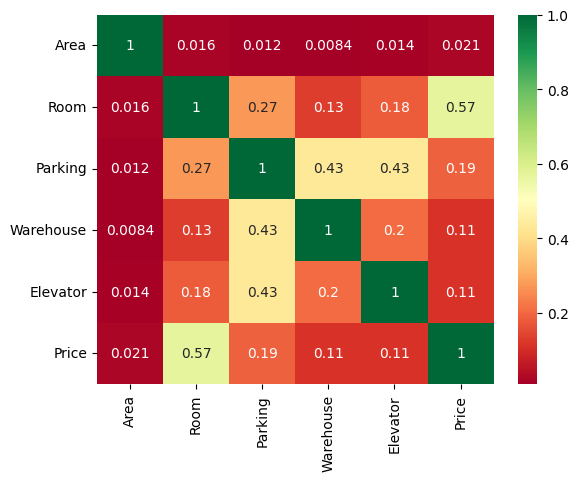

In [43]:
sns.heatmap(df3.corr(),annot = True, cmap = 'RdYlGn')

As you can see, if we omit the column for the address, the most important feature for price prediction is first the room.

With the help of the plotly library, we draw the plot-price chart.

In [44]:
fig = px.scatter(
    df2,
    x = 'Area',
    y = 'Price',

)
fig.show()

According to the graph, there is probably data with a very large area. So we detect and remove them outliers.

In [45]:
df2.drop(df2[df2['Area'] > 2000000000].index, inplace=True)

In [46]:
fig = px.scatter(
    df2,
    x = 'Area',
    y = 'Price',
    color = 'Room',
)
fig.show()

In [47]:
df2.drop(df2[df2['Area'] > 500].index, inplace=True)

In [48]:
fig = px.scatter(
    df2,
    x = 'Area',
    y = 'Price',
    color = 'Room',
)
fig.show()

In [49]:
px.box(x = 'Area',data_frame = df2)

In [50]:
px.box(x = 'Price',data_frame = df2)

In [51]:
DF = df2.copy()

In [52]:
DF.describe()

,Area,Room,Parking,Warehouse,Elevator,Price
count,3456.000000,3456.000000,3456.000000,3456.000000,3456.00000,3.456000e+03
mean,103.893808,2.072917,0.847801,0.914931,0.79022,5.192338e+09
std,55.459909,0.746943,0.359266,0.279025,0.40721,7.385237e+09
min,30.000000,0.000000,0.000000,0.000000,0.00000,3.600000e+06
25%,68.000000,2.000000,1.000000,1.000000,1.00000,1.400000e+09
50%,90.000000,2.000000,1.000000,1.000000,1.00000,2.850000e+09
75%,120.000000,2.000000,1.000000,1.000000,1.00000,6.000000e+09
max,500.000000,5.000000,1.000000,1.000000,1.00000,9.240000e+10


With the help of the following function we remove data known as outliers from the dataset.

In [53]:
def lower_upper(x):
    Q1 = np.percentile(x, 15)
    Q3 = np.percentile(x, 85)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return lower, upper

lower_area, upper_area = lower_upper(DF['Area'])
lower_price, upper_price = lower_upper(DF['Price'])


print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")

Lower limit for area: -67.50
Upper limit for area: 272.50
Lower limit for price: -11,312,500,000.0
Upper limit for price: 21,187,500,000.0


In [54]:
DF.drop(DF[DF['Area'] > 272.50].index, inplace=True)
DF.drop(DF[DF['Price'] > 21000000000].index, inplace=True)


In [55]:
print(f"Shape of new dataset: {DF.shape}")

Shape of new dataset: (3317, 199)


In [56]:
DF.describe()

,Area,Room,Parking,Warehouse,Elevator,Price
count,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3.317000e+03
mean,96.410009,2.016581,0.842327,0.913476,0.791076,4.088316e+09
std,38.916873,0.688543,0.364489,0.281179,0.406601,3.984893e+09
min,30.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06
25%,68.000000,2.000000,1.000000,1.000000,1.000000,1.330000e+09
50%,88.000000,2.000000,1.000000,1.000000,1.000000,2.700000e+09
75%,115.000000,2.000000,1.000000,1.000000,1.000000,5.400000e+09
max,270.000000,5.000000,1.000000,1.000000,1.000000,2.100000e+10


In [57]:
fig = px.scatter(
    DF,
    x = 'Area',
    y = 'Price',
    color = 'Room',
)
fig.show()

In [58]:
DF.drop(columns = 'Address', inplace = True)

###Model building

In [59]:
X = DF.drop(columns = 'Price')
y = DF['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y train: {y_test.shape}")

shape of x train: (2819, 197)
shape of y train: (2819,)
shape of x test: (498, 197)
shape of y train: (498,)


In [60]:
X_train.head()

,Area,Room,Parking,Warehouse,Elevator,Abazar,Abbasabad,Absard,Abuzar,Afsarieh,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
1965,65,2,1,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2561,240,4,1,1,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2412,50,1,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
461,141,3,1,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1049,66,2,1,1,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2819 entries, 1965 to 2880
Columns: 197 entries, Area to Zibadasht
dtypes: bool(192), int64(5)
memory usage: 660.7 KB


###Normalization data

In [67]:
sc = MinMaxScaler()
#X_train_scaled = sc.fit_transform(X_train)
#y_train_scaled = sc.fit_transform(y_train)
#X_test_scaled = sc.transform(X_test)
#y_test_scaled = sc.transform(y_test)

X_train_Scale = sc.fit_transform(X_train)
X_test_Scale = sc.transform(X_test)
X_train_Scaled_df = pd.DataFrame(X_train_Scale, columns=X_train.columns)
X_test_Scaled_df = pd.DataFrame(X_test_Scale, columns=X_test.columns)

y_train_scaled = sc.fit_transform(y_train.to_frame())
y_test_scaled = sc.transform(y_test.to_frame())

In [69]:
X_test_Scaled_df.head()

,Area,Room,Parking,Warehouse,Elevator,Abazar,Abbasabad,Absard,Abuzar,Afsarieh,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,0.134454,0.2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.264706,0.4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.033613,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.117647,0.2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
y_train_scaled

array([[0.09508297],
       [0.27130365],
       [0.01792688],
       ...,
       [0.59897887],
       [0.24034596],
       [0.07365072]])

In [73]:
def parameter_finder (model, parameters):

    start = time.time()

    grid = GridSearchCV(model,
                        param_grid = parameters,
                        refit = True,
                        cv = KFold(shuffle = True, random_state = 1),
                        n_jobs = 1)
    grid_fit = grid.fit(X_train_Scale, y_train_scaled)
    y_train_pred = grid_fit.predict(X_train_Scale)
    y_pred = grid_fit.predict(X_test_Scale)

    train_score =grid_fit.score(X_train_Scale, y_train_scaled)
    test_score = grid_fit.score(X_test_Scale, y_test_scaled)
    RMSE = np.sqrt(mean_squared_error(y_test_scaled, y_pred))

    model_name = str(model).split('(')[0]

    end = time.time()

    print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
    print("--" * 10)
    print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
    print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
    print(f"RMSE is {RMSE:,} for {model_name} model.")
    print("--" * 10)
    print(f"Runtime of the program is: {end - start:0.2f}")


    return train_score, test_score, RMSE

In [74]:
ridge = Ridge(random_state = 1) # Linear least squares with l2 regularization.
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

ridge_train_score, ridge_test_score, ridge_RMSE = parameter_finder(ridge, param_ridge)


The best parameters for Ridge model is: {'alpha': 1}
--------------------
(R2 score) in the training set is 86.59% for Ridge model.
(R2 score) in the testing set is 85.34% for Ridge model.
RMSE is 0.0698785242590289 for Ridge model.
--------------------
Runtime of the program is: 1.32


In [75]:
lasso = Lasso(random_state = 1) # Linear Model trained with L1 prior as regularizer.
param_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

lasso_train_score, lasso_test_score, lasso_RMSE = parameter_finder(lasso, param_lasso)

The best parameters for Lasso model is: {'alpha': 0.001}
--------------------
(R2 score) in the training set is 76.35% for Lasso model.
(R2 score) in the testing set is 76.85% for Lasso model.
RMSE is 0.08781041455401324 for Lasso model.
--------------------
Runtime of the program is: 1.24


In [76]:
eln = ElasticNet(random_state = 1) # Linear regression with combined L1 and L2 priors as regularizer.
param_eln = {'alpha': [0.001, 0.01, 0.1, 1, 10],
            'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7]}

eln_train_score, eln_test_score, eln_RMSE = parameter_finder(eln, param_eln)

The best parameters for ElasticNet model is: {'alpha': 0.001, 'l1_ratio': 0.3}
--------------------
(R2 score) in the training set is 82.30% for ElasticNet model.
(R2 score) in the testing set is 82.54% for ElasticNet model.
RMSE is 0.076265017603054 for ElasticNet model.
--------------------
Runtime of the program is: 3.39


In [77]:
dtr = DecisionTreeRegressor(random_state = 1)
param_dtr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3]}

dtr_train_score, dtr_test_score, dtr_RMSE = parameter_finder(dtr, param_dtr)

The best parameters for DecisionTreeRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 4}
--------------------
(R2 score) in the training set is 97.73% for DecisionTreeRegressor model.
(R2 score) in the testing set is 77.50% for DecisionTreeRegressor model.
RMSE is 0.08655711592118605 for DecisionTreeRegressor model.
--------------------
Runtime of the program is: 1.90


In [78]:
rfr = RandomForestRegressor(random_state = 1, n_jobs = -1)
param_rfr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3]}

rfr_train_score, rfr_test_score, rfr_RMSE = parameter_finder(rfr, param_rfr)

The best parameters for RandomForestRegressor model is: {'min_samples_leaf': 1, 'min_samples_split': 5}
--------------------
(R2 score) in the training set is 95.42% for RandomForestRegressor model.
(R2 score) in the testing set is 85.60% for RandomForestRegressor model.
RMSE is 0.06925146967653432 for RandomForestRegressor model.
--------------------
Runtime of the program is: 93.61


In [79]:
xgboost = XGBRegressor(n_jobs = 1)
param_xgboost = {'n_estimators': [100,300],
             'learning_rate': [0.1,0.05],
             'subsample': [0.75],
             'colsample_bytree': [1],
             'max_depth': [3,4,5],
             'gamma': [0]}

xgboost_train_score, xgboost_test_score, xgboost_RMSE = parameter_finder(xgboost, param_xgboost)

The best parameters for XGBRegressor model is: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.75}
--------------------
(R2 score) in the training set is 93.53% for XGBRegressor model.
(R2 score) in the testing set is 88.63% for XGBRegressor model.
RMSE is 0.06152831628121079 for XGBRegressor model.
--------------------
Runtime of the program is: 18.36


As you can see، the best model for this data is the XGBOOST model.